In [64]:
 #install.packages("GGally")
 library(GGally)
 library(readxl)
#install.packages('dplyr')
 library(dplyr)
library("tibble")
#install.packages('tidyr')
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 4.0.5"


In [105]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.exp =read_excel("../../results/df-water-explore.xlsx" ,sheet=1)
df.cluster = read_excel("../../results/df-fa-seven-cluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.exp$clusters <- as.factor(df.cluster$clusters)
df <- merge(x = df.exp,
              y = df.wb,
              by = c("Country"))

df <- df[, c(1:13, 17,21)]

#scaling the world bank data similar to DHS aggregation out of 100
df.wb <- df[,c(9:15)]
df.wb <- data.frame(lapply(df.wb, function(x) scale(x, center = FALSE, scale = max(x, na.rm = TRUE)/100)))
df.scale <- cbind(df, df.wb)
df.scale <- df.scale[,c(1:8,15:21)]
                           
df <- df%>%
  mutate(clusters=case_when(
    .$clusters=="1" ~ "Decentralized",
    .$clusters=="2" ~ "Hybrid",
    .$clusters=="3" ~ "Centralized",
      ))           
                        
clusters <- df$clusters
df.wa$clusters <- clusters
    
df <- df[,c(1,2,3,4,5,6,7,9,10,11,12,13,14,15,8)]       

                           df.wa <- df.wa %>% 
  rename(
    'Piped (Dwelling)' = phom ,
     'Piped (Yard)' = pipy,
     'Public Tap' = ptap,
      'Borehole'=bore,
      'Protected Well'=pwel,
     'Protected Spring' =pspr,
      'Rain'= rain,
      'Unprotected Well'=uwel,
      'Unprotected Spring'=uspr,
     'Truck' =truc,
      'Tanker Cart'=ctan,
      'Bottled'=bott,
     'Other' =othw,
     'Surface' =surw,
      'T<30min'=tles,
      'T>30min' =tmor,
     'On-Premises' =watp,
    )
                           
                           df <- df %>% 
  rename(
    'Bicycle' = bicy ,
     'Animal Cart' = cart,
     'Motorcycle' = mcyc,
      'Car'=pcar,
      'Boat'=boat,
     'Gini Index' =wigc,
      'GDP (US$)'= cgdp,
      'Total Population'=tpop,
      'Urban Population'=upop,
     'Population density (per sq. km)' =popd,
      'Land area (sq. km) '=land,
      'Renewable internal freshwater resources (per capita cu. m) '=rifr,
     'Precipitation (mm per year)' =prec
    )

Country,Piped (Dwelling),Piped (Yard),Public Tap,Borehole,Protected Well,Protected Spring,Rain,Unprotected Well,Unprotected Spring,Truck,Tanker Cart,Bottled,Other,Surface,T<30min,T>30min,On-Premises,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3,Decentralized
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9,Hybrid
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5,Decentralized
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6,Centralized
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9,Centralized
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5,Hybrid


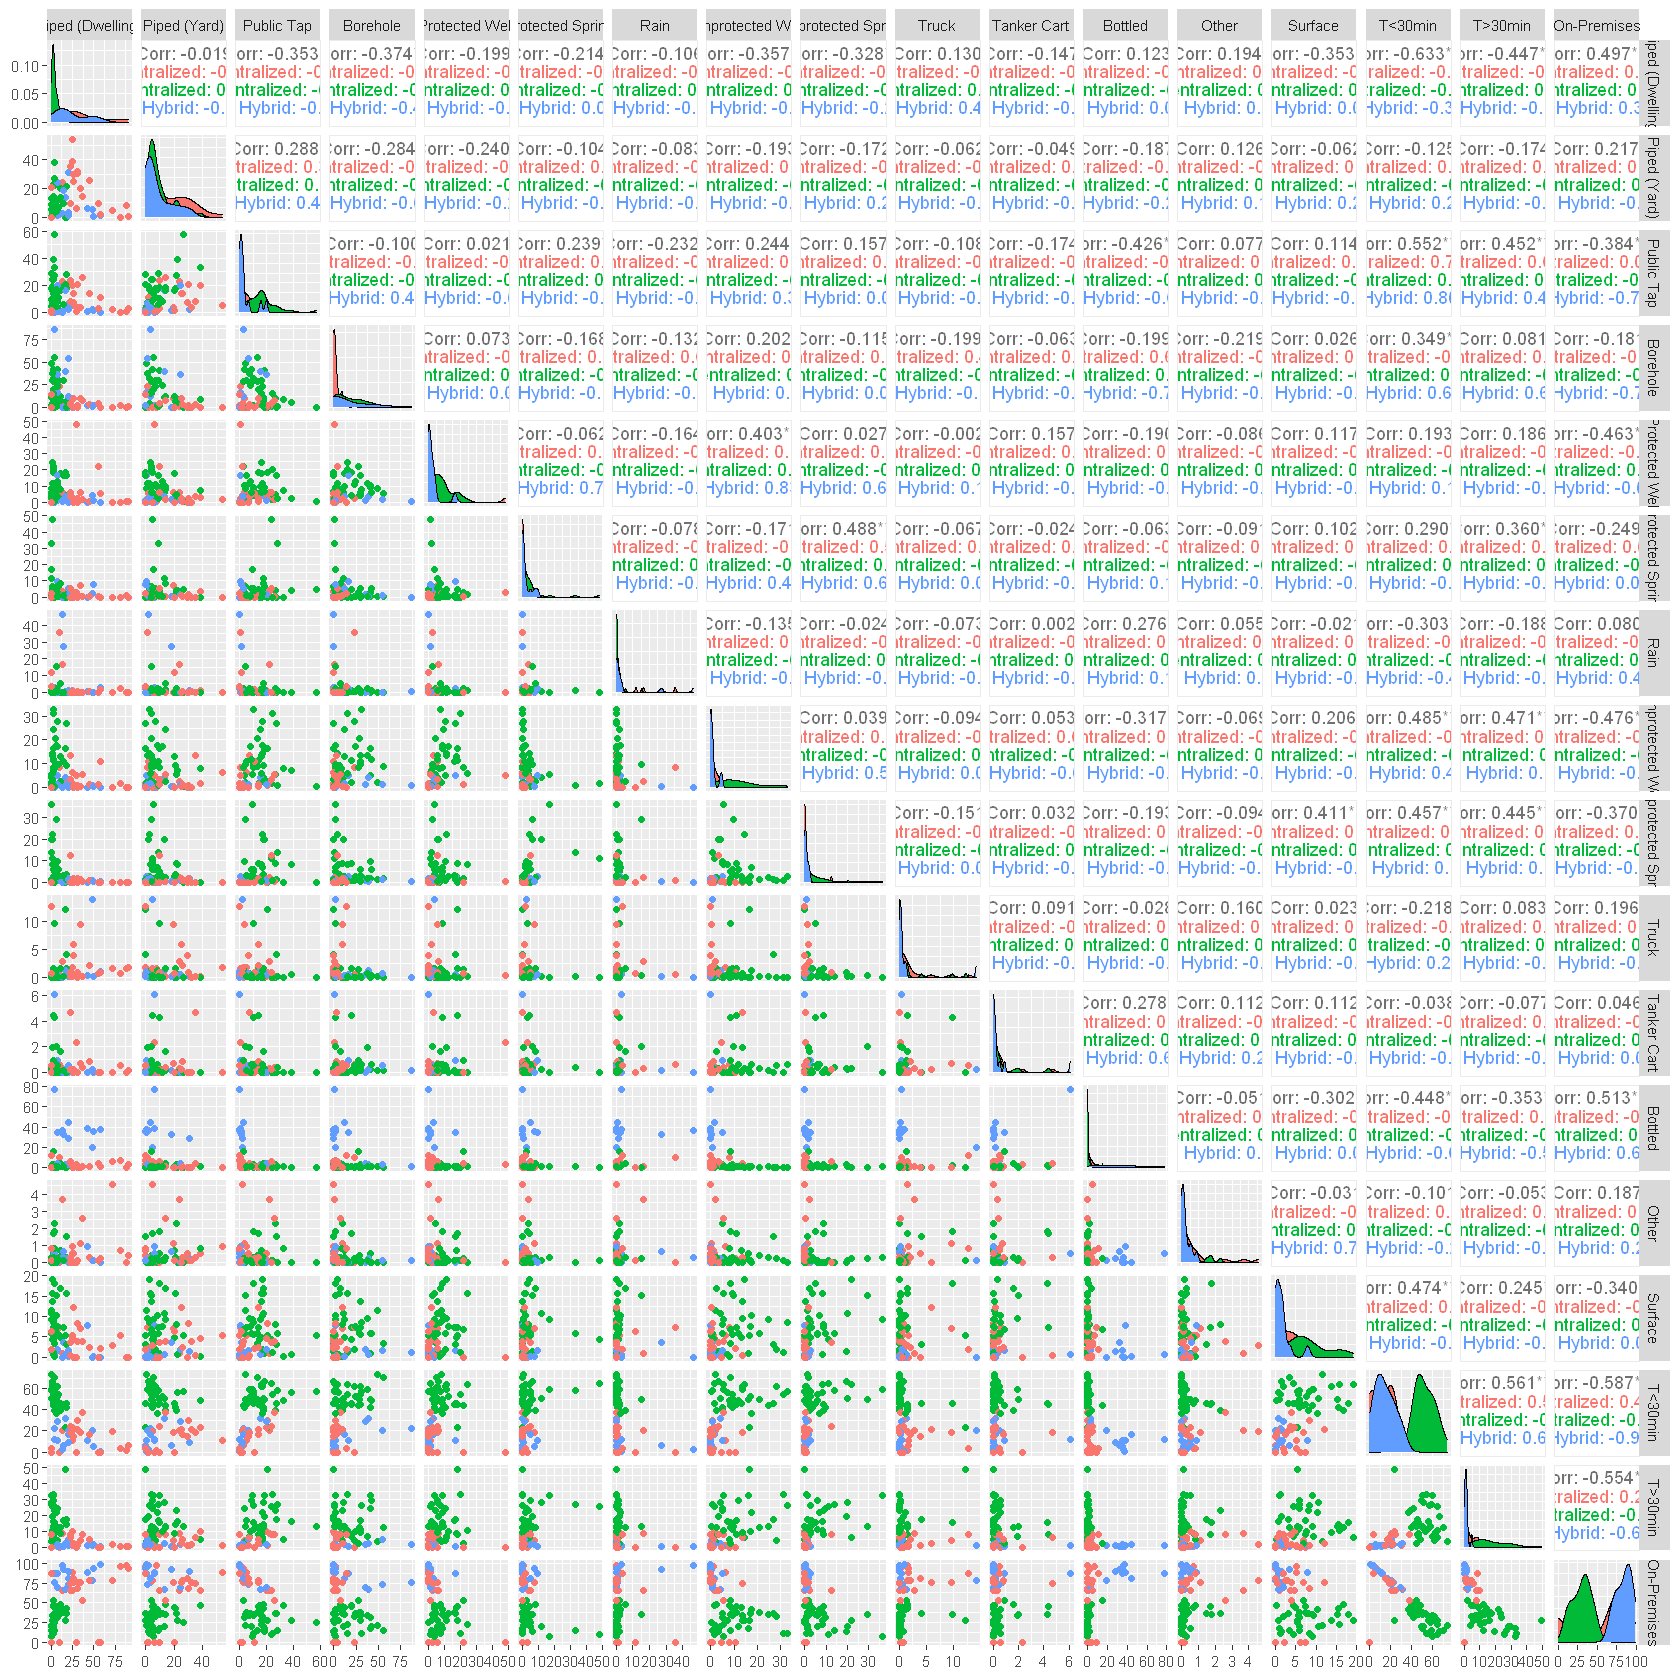

In [92]:
# Data Analysis for 17 Water accessiiblity variables with ggpairs
head(df.wa)
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1, 1, 1, 4), cex.axis = 1, cex.lab = .8) 
ggpairs(df.wa, columns = 2:18, ggplot2::aes(colour=clusters))

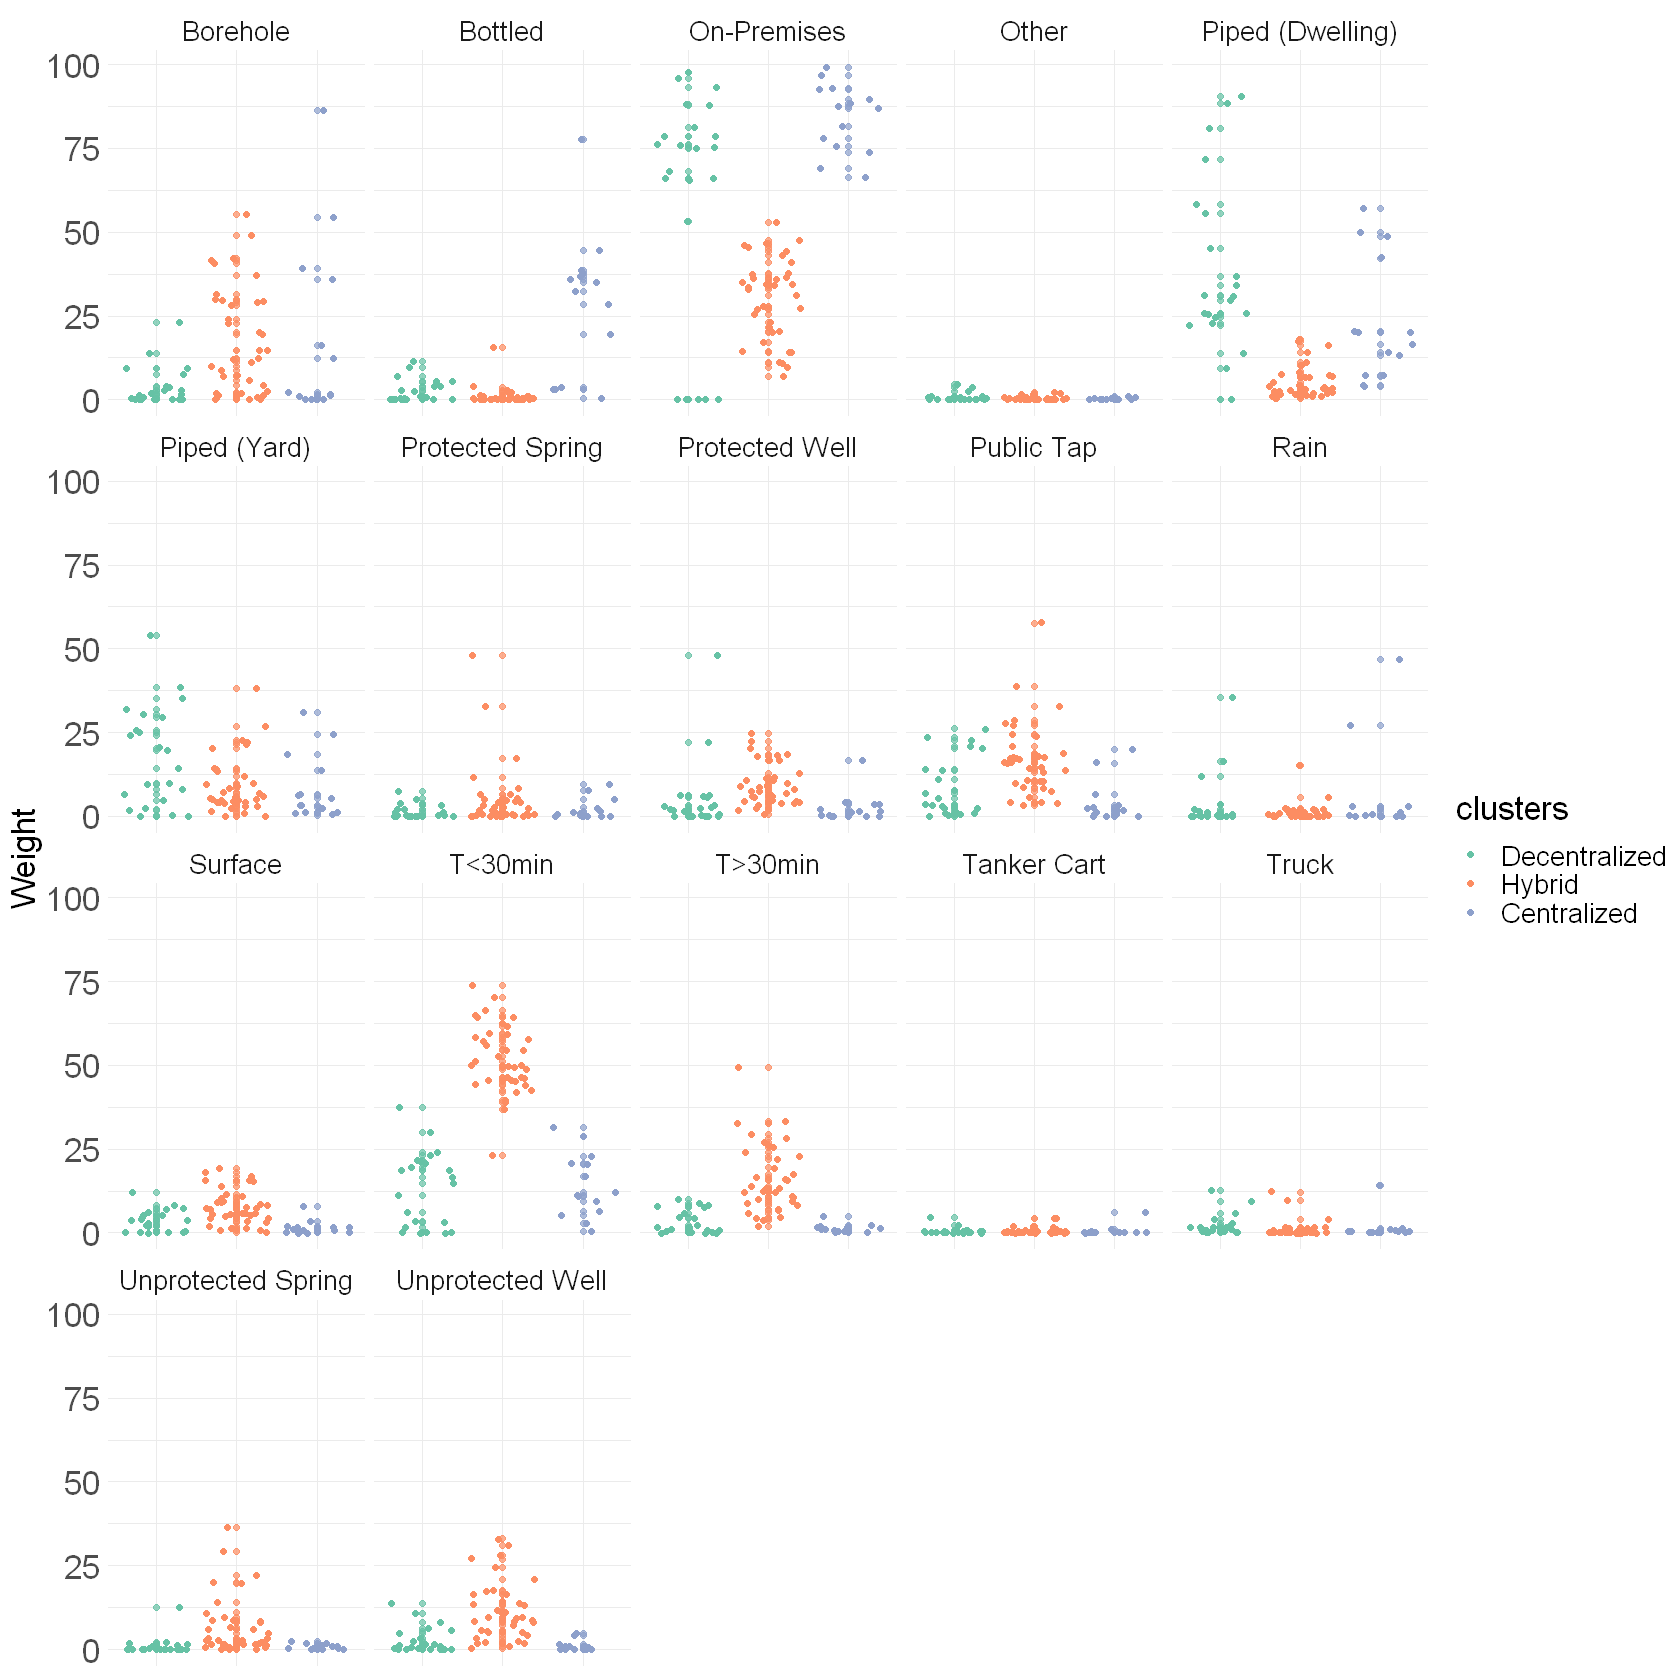

In [96]:
countries_gathered <- df.wa %>% gather(Measure, Weight, 'Piped (Dwelling)':'On-Premises') 


ggplot(countries_gathered, aes(clusters, Weight, color = clusters)) +
  theme_minimal() +
  geom_point(alpha = 0.7) +
  geom_jitter() +
  facet_wrap(~Measure)  + 
  scale_color_manual(name = 'clusters', labels = c("Decentralized" , "Hybrid", "Centralized"),
                     values=c('#66c2a5','#fc8d62', '#8da0cb') ) +
    theme(text = element_text(size=20) , axis.title.x = element_blank(), axis.text.x=element_blank()) + #Font size
    theme(axis.text = element_text(size = 20)) + #All tick size  
    theme(axis.title = element_text(size = 20))  # Adjusting Axis Title   

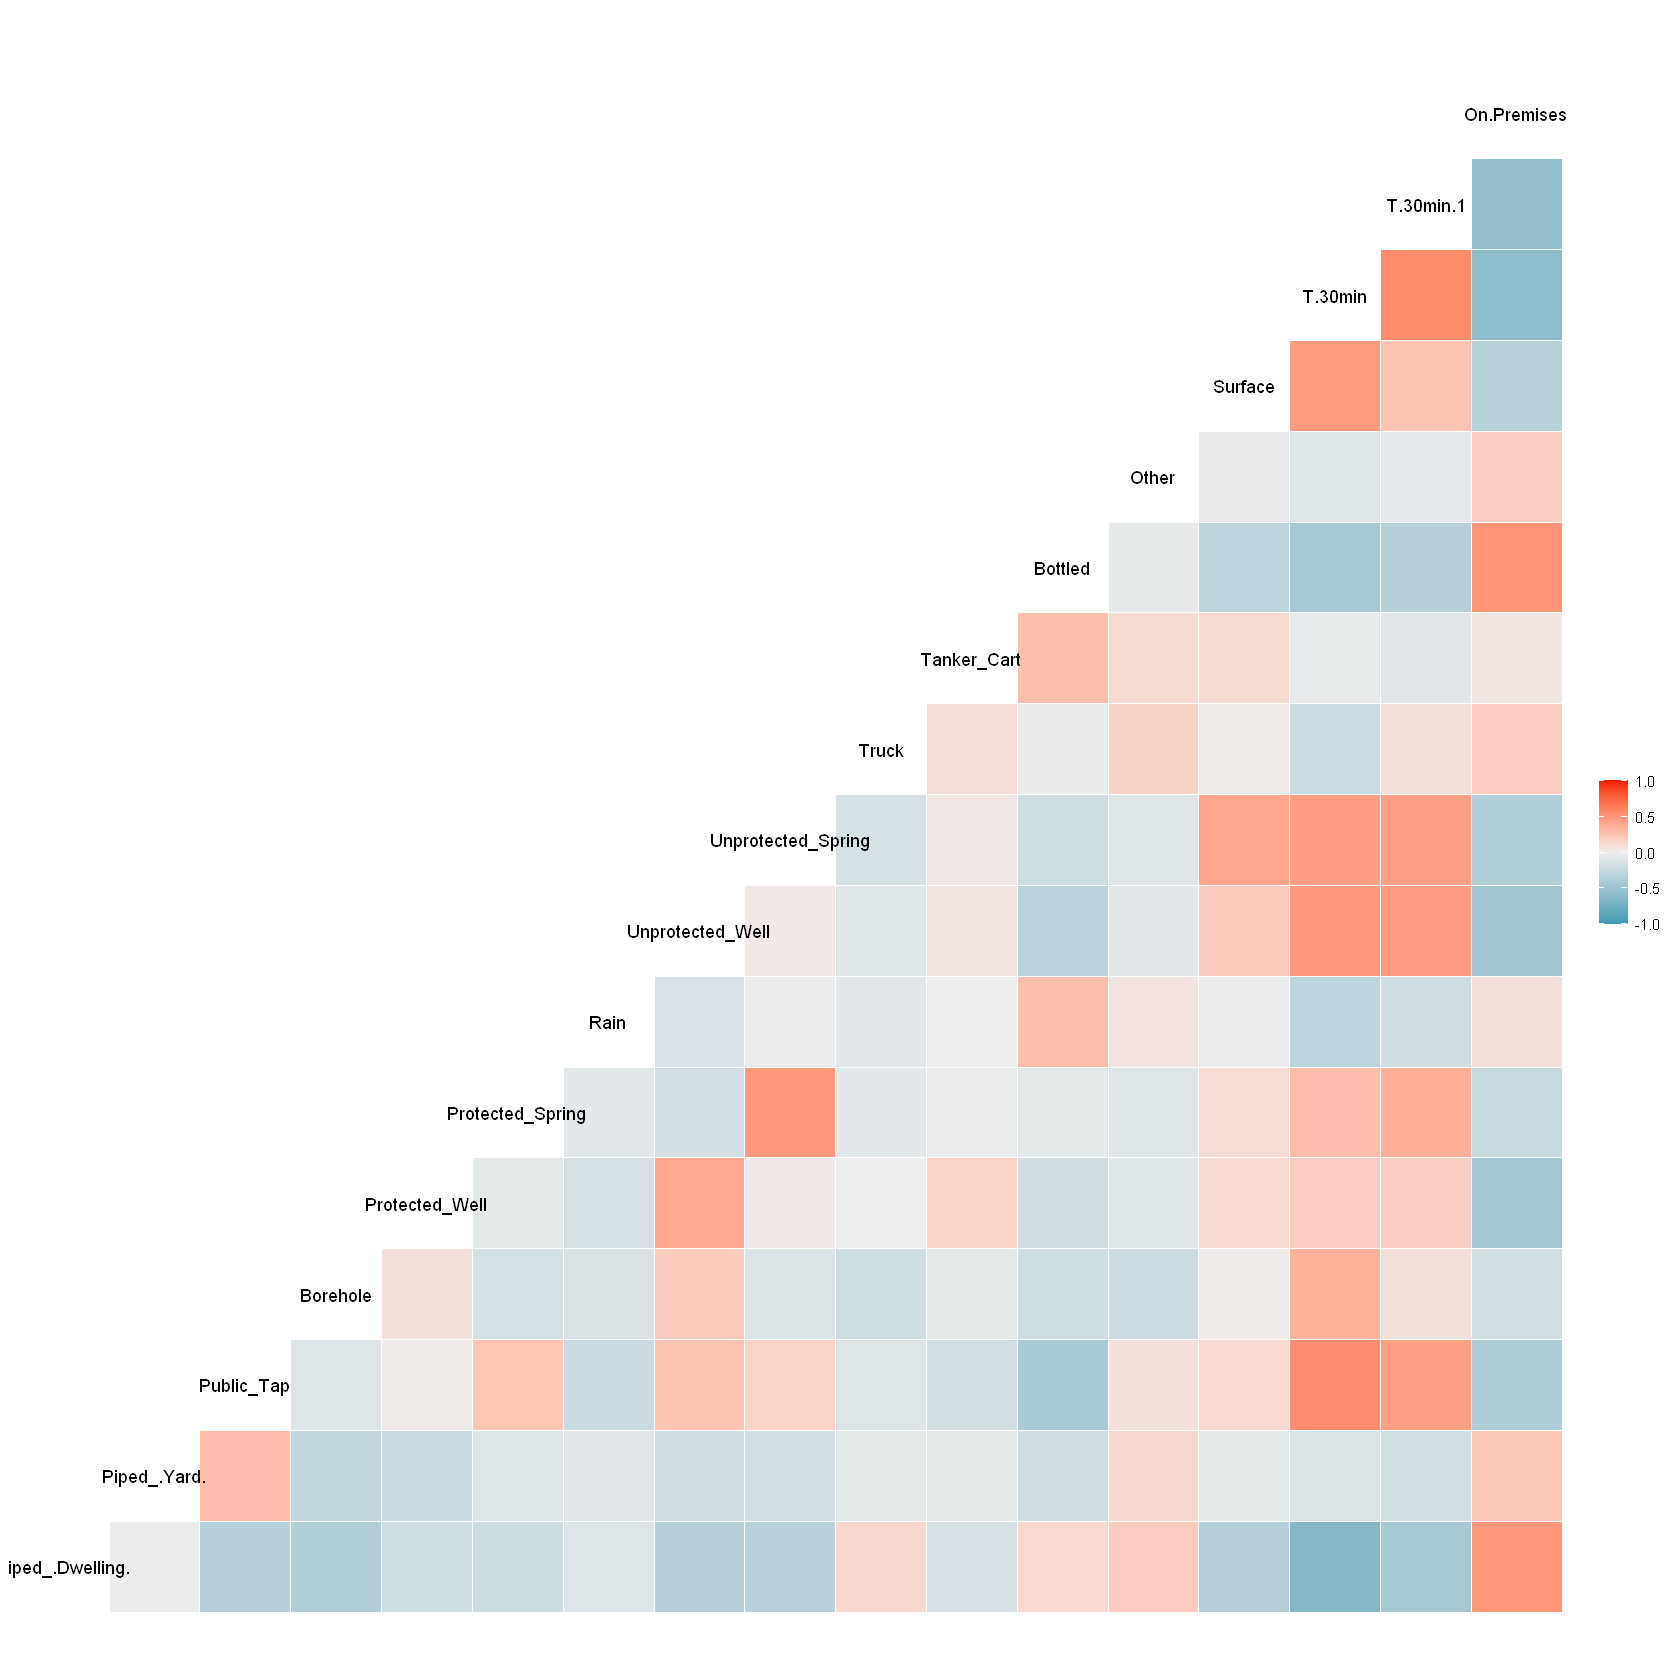

In [103]:
#Correlation graph
ggcorr(df.wa[,c(2:18)])

,Country,Bicycle,Animal Cart,Motorcycle,Car,Boat,Gini Index,GDP (US$),Total Population,Urban Population,Population density (per sq. km),Land area (sq. km),Renewable internal freshwater resources (per capita cu. m),Precipitation (mm per year),clusters
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,18353881130,37172386,25.495,56.93776,652860,1299.0269,327,Decentralized
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,15147020535,2866376,60.319,104.61226,27400,9361.5460,1485,Hybrid
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,101353230785,30809762,65.514,24.71305,1246700,4963.6533,1010,Decentralized
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,12457941907,2951776,63.149,103.68022,28470,2329.1833,562,Centralized
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,47112941176,9939771,55.680,120.23432,82670,823.5207,447,Centralized
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,274039092455,161356039,36.632,1239.57931,130170,657.6039,2666,Hybrid


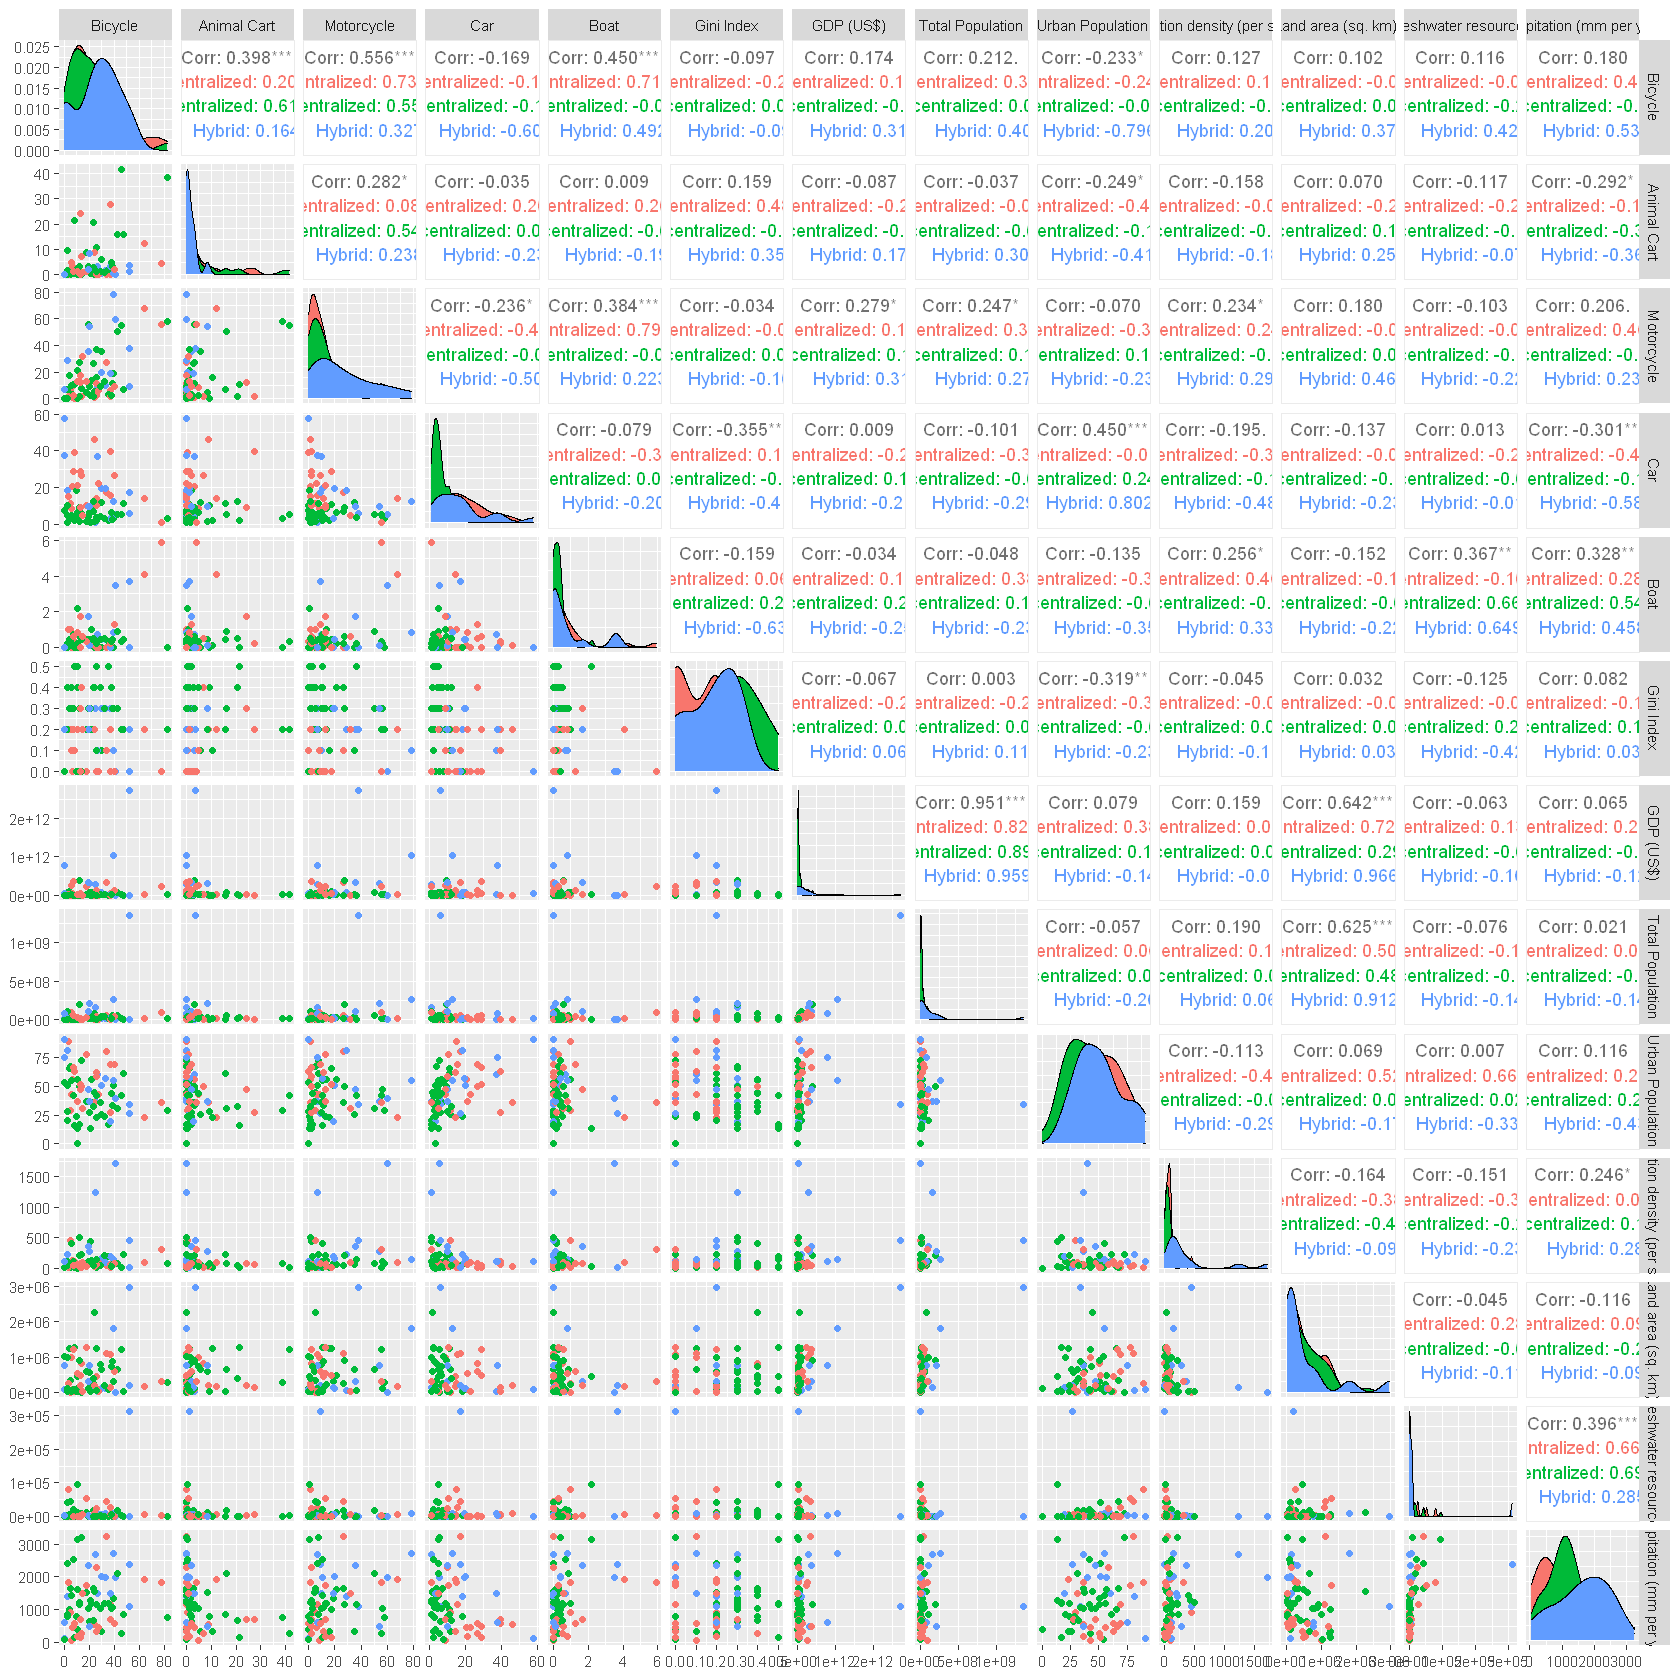

In [100]:
#Data Anaylsis for 13 explnatory variables with ggpairs
head(df)
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,4), cex.axis = 1, cex.lab = .8) 
ggpairs(df, columns = 2:14, ggplot2::aes(colour=clusters))

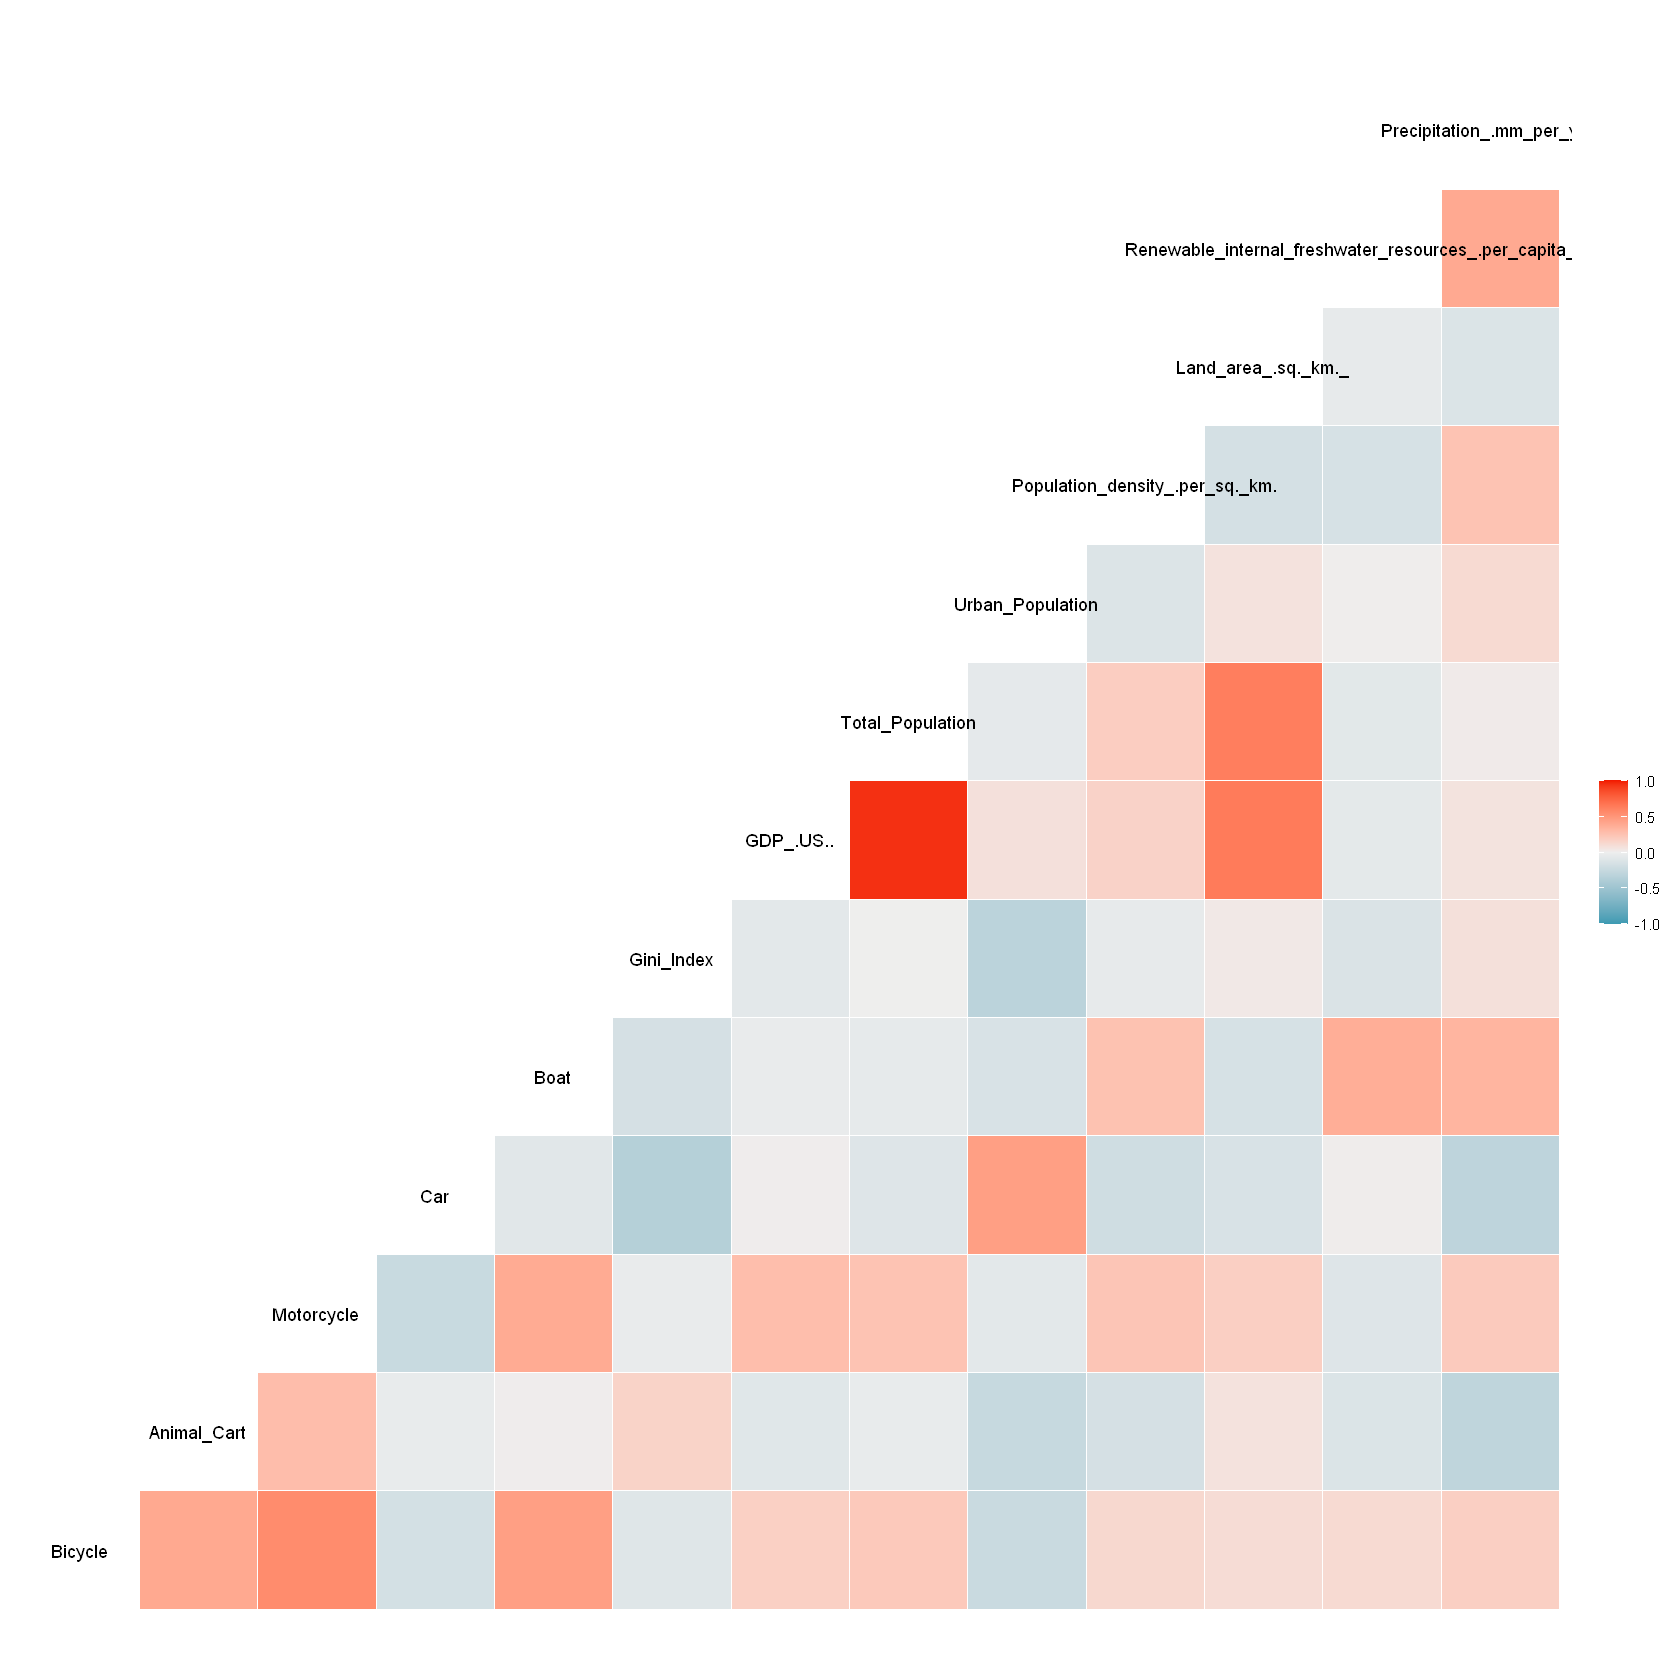

In [102]:
#Correlation graph
ggcorr(df[,c(2:14)])

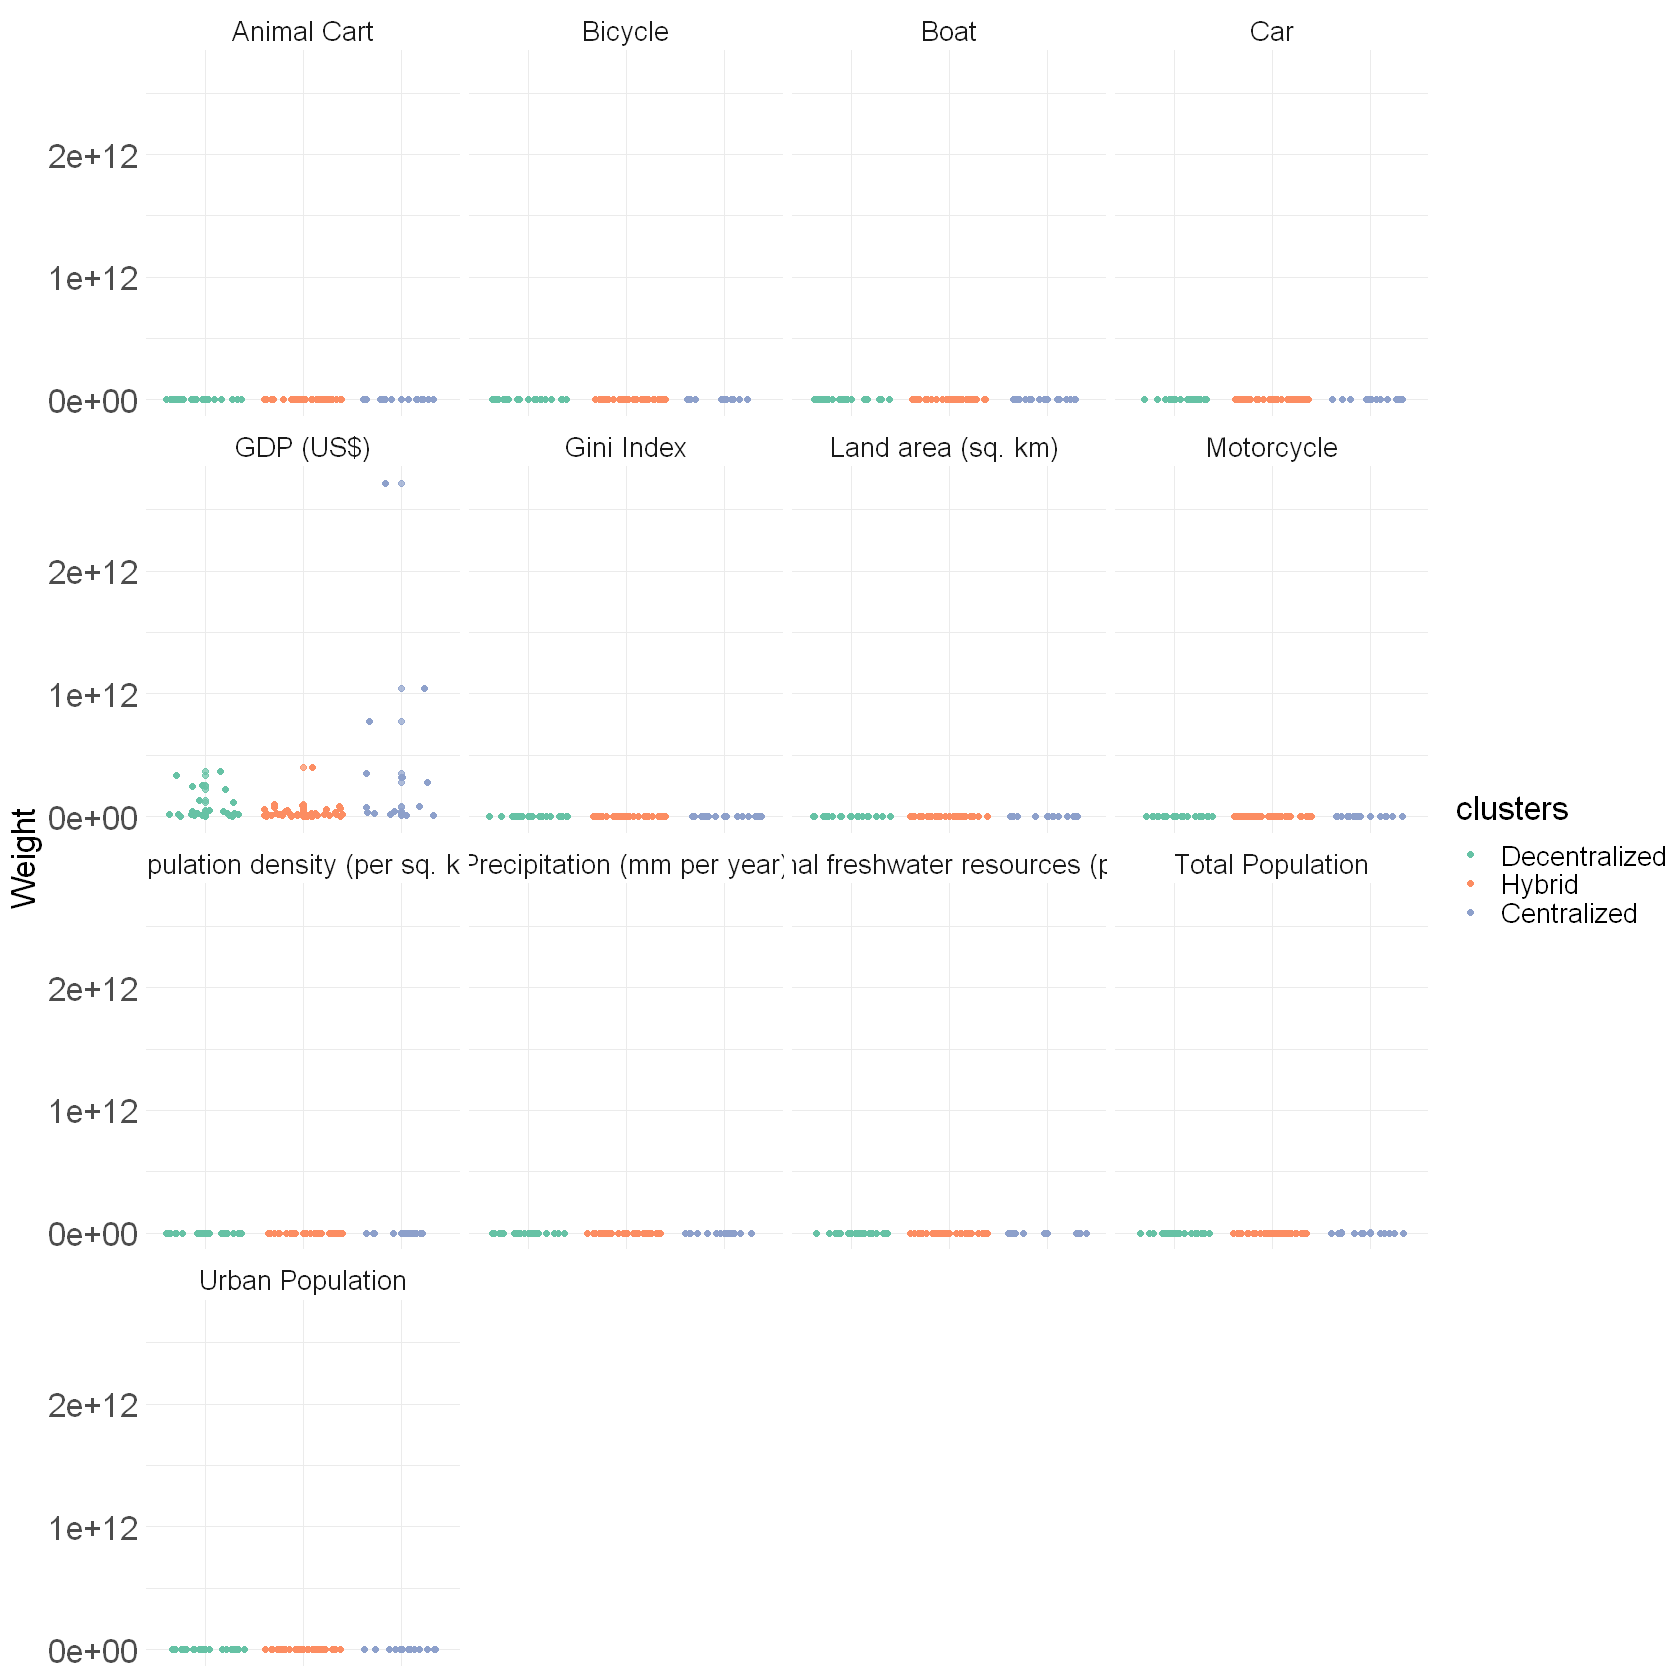

In [106]:
df_gathered <- df %>% gather(Measure, Weight, 'Bicycle':'Precipitation (mm per year)') 


ggplot(df_gathered, aes(clusters, Weight, color = clusters)) +
  theme_minimal() +
  geom_point(alpha = 0.7) +
  geom_jitter() +
  facet_wrap(~Measure)  + 
  scale_color_manual(name = 'clusters', labels = c("Decentralized" , "Hybrid", "Centralized"),
                     values=c('#66c2a5','#fc8d62', '#8da0cb') ) +
    theme(text = element_text(size=20) , axis.title.x = element_blank(), axis.text.x=element_blank()) + #Font size
    theme(axis.text = element_text(size = 20)) + #All tick size  
    theme(axis.title = element_text(size = 20))  # Adjusting Axis Title   